In [3]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항 feature를 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

# maplotlib.rcParams['font.family'] = 'AppleGothic Gothic   # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

In [5]:
# 데이터 전처리1 -null,0,피쳐 값 분포, 타입
df['length'].unique() # 0 값은 없다
df.info()             # null 값도 없다
df.describe()

# 일반 선형회귀 - 표준화작업이 필요 없음. 
# 하지만, 특성추가, 규제 조정을 해야할 시에 -> 표준화작업이 필요함(거의 표준화작업을 한다고 생각하면 됨!)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [6]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [7]:
ser = pd.Series(perch_weight)

In [8]:
ser.info()
ser.describe()

<class 'pandas.core.series.Series'>
RangeIndex: 56 entries, 0 to 55
Series name: None
Non-Null Count  Dtype  
--------------  -----  
56 non-null     float64
dtypes: float64(1)
memory usage: 580.0 bytes


count      56.000000
mean      382.239286
std       347.617717
min         5.900000
25%       120.000000
50%       207.500000
75%       692.500000
max      1100.000000
dtype: float64

In [9]:
# 데이터 전처리2 - train,test set 분리
train_input,test_input,train_target,test_target = train_test_split(
    perch_full,perch_weight,random_state=42
)

In [10]:
# 데이터 훈련시키기

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input,train_target)

LinearRegression()

In [11]:
# 데이터 예측률
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9559326821885706
0.8796419177546367


In [12]:
# 특성을 추가해서 모델을 적용 (차수를 늘려서 곡선형을 띌 수 있게)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)   # 몇배로 늘려서 적용하고 싶은지 설정
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [13]:
lr = LinearRegression()
lr.fit(train_poly,train_target)  # 다항회귀의 훈련

LinearRegression()

In [14]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9903183436982126
0.9714559911594125


In [15]:
# 규제 - 릿지규제, 라쏘규제
# 규제를 적용하려면, 표준화 작업 필요
# 위에서 진행 완료
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [16]:
# 릿지 규제
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(train_scaled,train_target)

Ridge()

In [17]:
ridge.score(train_scaled,train_target)

0.9857915060511934

In [18]:
ridge.score(test_scaled,test_target)

0.9835057194929057

In [19]:
# Ridge(alpha=n) # 0.001,0.01,0.1,1,10,100
# 이중 가장 좋은 정확도를 나타내는 alpha값을 찾는다.

In [20]:
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100]  # 6개

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))
    

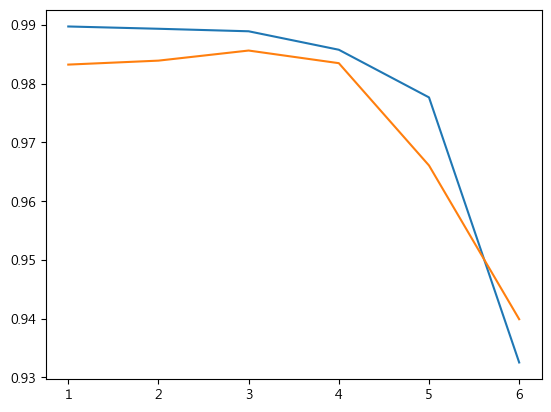

In [21]:
# x = [[1],[2],[3],[4],[5],[6],[7]]
x = np.arange(1,7).reshape(-1,1)
plt.plot(x,train_score)
plt.plot(x,test_score)
plt.show()

In [22]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)    
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9889354346720892
0.9856564835209134


In [23]:
# 선형회귀
# - 1. 모델구현,테스트
# - 2. 특성을 추가해서 테스트
# - 3. 특성을 degree 계속 늘려서 테스트
# - 4. train예측률은 높은데, test 예측률 너무 낮으면
# - 5. 규제를 통해 test 예측률 높임 -> Ridege
# - 6. 규제 alpha값을 변동을 해서, 예측률이 가장 높은 alpha값을 채택해서 최종 모델 구현